In [215]:
# Importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [216]:
# Importing the dataset in chunksize as it is a large dataset

chunk_telecom_df=pd.read_csv("telecom_churn_data.csv",engine='python',
                             encoding ='utf-8',low_memory=True,chunksize=25000,iterator=True)

df=pd.concat(chunk_telecom_df,ignore_index=True)

df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


## Data Understanding

In [217]:
df.shape  # Checking the shape

(99999, 226)

In [218]:
df.info()  # Checking the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [219]:
df.describe()  # Describing the dataset to check outliers

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [220]:
df.dtypes  # Checking the datatypes for all columns

mobile_number             int64
circle_id                 int64
loc_og_t2o_mou          float64
std_og_t2o_mou          float64
loc_ic_t2o_mou          float64
last_date_of_month_6     object
last_date_of_month_7     object
last_date_of_month_8     object
last_date_of_month_9     object
arpu_6                  float64
arpu_7                  float64
arpu_8                  float64
arpu_9                  float64
onnet_mou_6             float64
onnet_mou_7             float64
onnet_mou_8             float64
onnet_mou_9             float64
offnet_mou_6            float64
offnet_mou_7            float64
offnet_mou_8            float64
offnet_mou_9            float64
roam_ic_mou_6           float64
roam_ic_mou_7           float64
roam_ic_mou_8           float64
roam_ic_mou_9           float64
roam_og_mou_6           float64
roam_og_mou_7           float64
roam_og_mou_8           float64
roam_og_mou_9           float64
loc_og_t2t_mou_6        float64
                         ...   
arpu_2g_

## Data Cleaning

In [221]:
round(df.isnull().sum(axis=0)/len(df)*100,2)   # Checking null values for all columns

mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

### Dropping columns/rows having null values more than 30% from the total dataset

In [222]:
# Columns

drop_cols=df.isnull().sum(axis=0)
drop_cols=drop_cols[drop_cols.values/len(df)>0.30]
len(drop_cols)

40

In [223]:
# Dropping the columns having more than 30% null values

drop_columns=list(drop_cols.keys())
df=df.drop(drop_columns,axis=1)

In [224]:
# Rows

drop_cols1=df.isnull().sum(axis=0)
drop_cols1=drop_cols1[drop_cols1.values/len(df)>0.30]
len(drop_cols1)

0

**40 columns were dropped having more than 30% null values, no rows are having more than 30% null values hence not dropped any rows.**

In [225]:
round(df.isnull().sum(axis=0)/len(df)*100,2)  # Checking again now for null values

mobile_number           0.00
circle_id               0.00
loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_6    0.00
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
arpu_9                  0.00
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
                        ... 
last_day_rch_amt_9      0.00
vol_2g_mb_6             0.00
vol_2g_mb_7             0.00
vol_2g_mb_8   

### Imputing missing values

**First, dropping redundant columns and imputing median value for numerical columns as we have outliers and median is the best choice to make.**

In [226]:
# Dropping redundant columns

df=df.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

df=df.fillna(df.median())

Checking for null values if left any.

In [227]:
df.columns[df.isnull().any()].tolist()

['last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

**Imputing values with maximum occurance for a particular columns**

In [228]:
df['last_date_of_month_7']=df['last_date_of_month_7'].fillna(df['last_date_of_month_7'].unique().tolist()[0])
df['last_date_of_month_8']=df['last_date_of_month_8'].fillna(df['last_date_of_month_8'].unique().tolist()[0])
df['last_date_of_month_9']=df['last_date_of_month_9'].fillna(df['last_date_of_month_9'].unique().tolist()[0])

In [229]:
df['date_of_last_rech_6']=df['date_of_last_rech_6'].fillna(df['date_of_last_rech_6'].value_counts().keys()[0])
df['date_of_last_rech_7']=df['date_of_last_rech_7'].fillna(df['date_of_last_rech_7'].value_counts().keys()[0])
df['date_of_last_rech_8']=df['date_of_last_rech_8'].fillna(df['date_of_last_rech_8'].value_counts().keys()[0])
df['date_of_last_rech_9']=df['date_of_last_rech_9'].fillna(df['date_of_last_rech_9'].value_counts().keys()[0])

In [230]:
df.columns[df.isnull().any()].tolist()

[]

**Now, our databaset is totally cleaned and ready for the next step of analysis**

## Data Visualization

### Univariate analysis

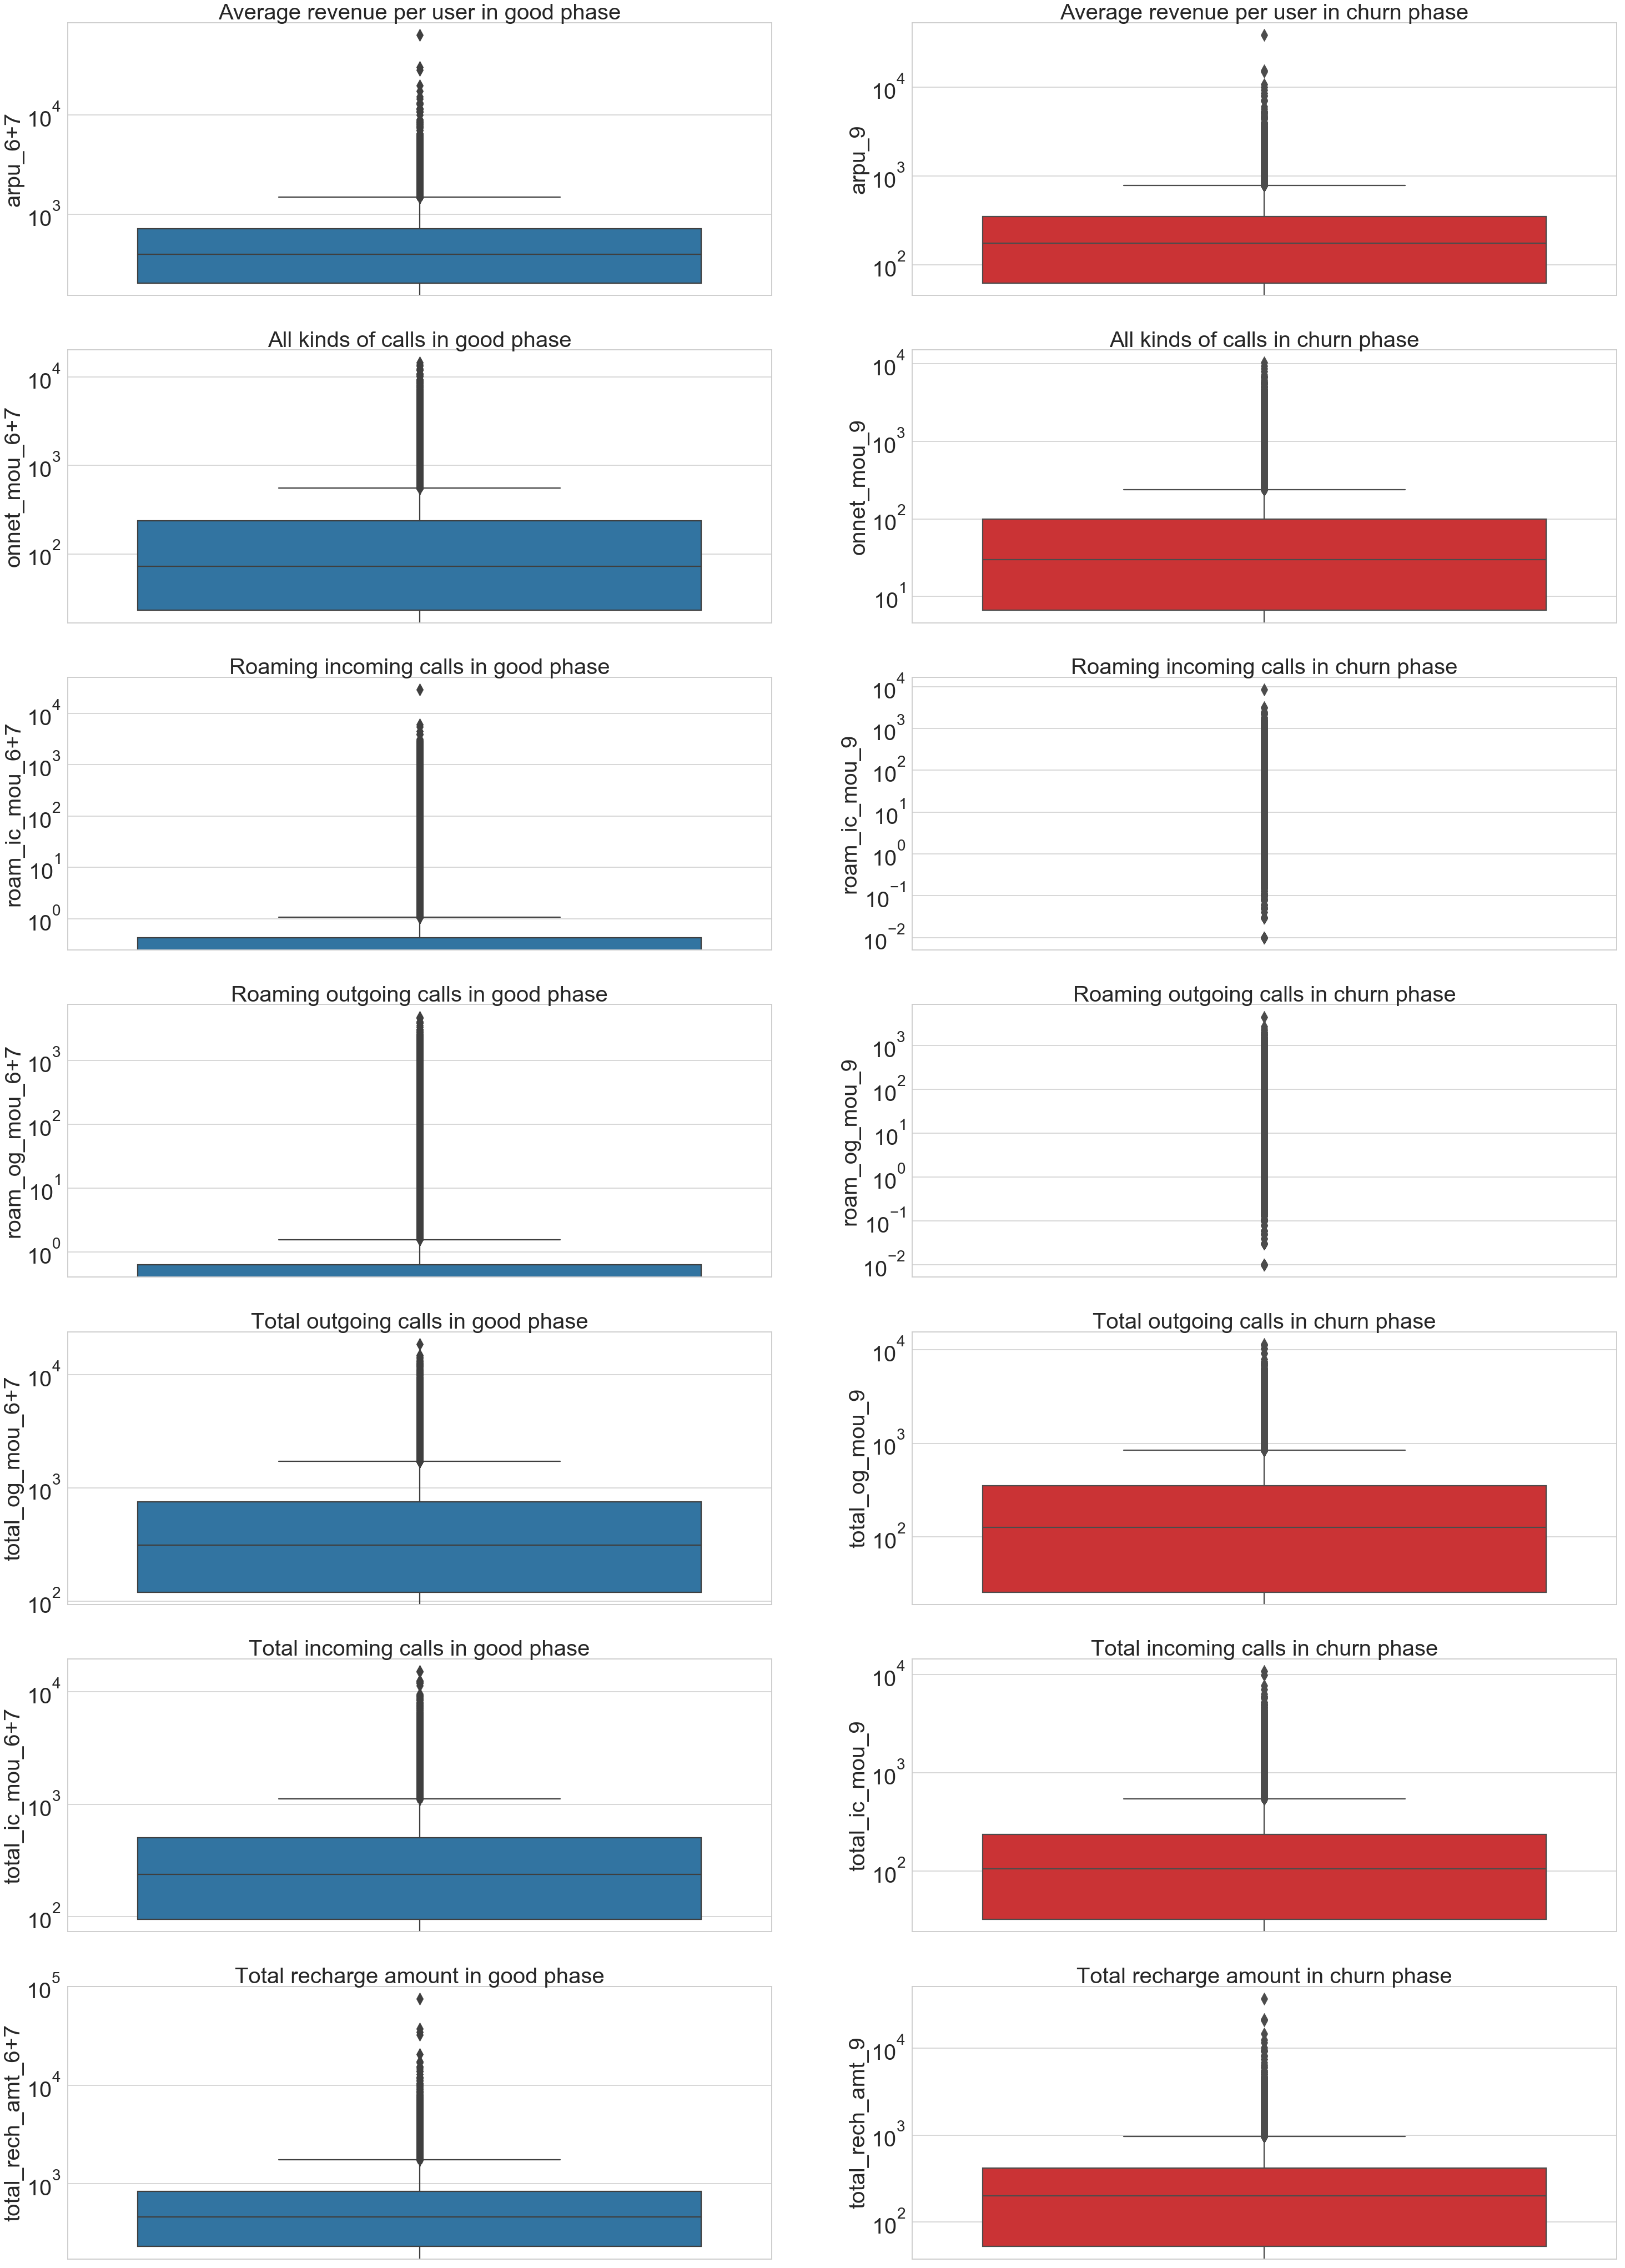

In [231]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(50,150))
plt.tight_layout()
sns.set_style('whitegrid')
sns.set_context('talk')

# Title and columns names for the dataset

col={0:['arpu_6','arpu_7','Average revenue per user in good phase'],1:['arpu_9','Average revenue per user in churn phase'],
     2:['onnet_mou_6','onnet_mou_7','All kinds of calls in good phase'],3:['onnet_mou_9','All kinds of calls in churn phase'],
     4:['roam_ic_mou_6','roam_ic_mou_7','Roaming incoming calls in good phase'],5:['roam_ic_mou_9','Roaming incoming calls in churn phase'],
     6:['roam_og_mou_6','roam_og_mou_7','Roaming outgoing calls in good phase'],7:['roam_og_mou_9','Roaming outgoing calls in churn phase'],
     8:['total_og_mou_6','total_og_mou_7','Total outgoing calls in good phase'],9:['total_og_mou_9','Total outgoing calls in churn phase'],
     10:['total_ic_mou_6','total_ic_mou_7','Total incoming calls in good phase'],11:['total_ic_mou_9', 'Total incoming calls in churn phase'],
     12:['total_rech_amt_6','total_rech_amt_7','Total recharge amount in good phase'],
     13:['total_rech_amt_9','Total recharge amount in churn phase']}

# Visualising the outliers with boxplot for all the variables 

for i in range(14):
    plt.subplot(14,2,i+1)
    plt.yticks(fontsize=40)
    plt.yscale('log')
    if len(col[i])==3:
        plt.title(col[i][2],fontsize=40)
        plt.ylabel(col[i][0]+'+7',size=40)
        sns.boxplot(x=df[col[i][0]]+df[col[i][1]],data=df,palette='tab10',orient='v',fliersize=15)  # using boxplot
    else:
        plt.title(col[i][1],fontsize=40)
        plt.ylabel(col[i][1],size=40)
        sns.boxplot(x=df[col[i][0]],data=df,palette='Paired_r',orient='v',fliersize=15)  # using boxplot
    
        

  

Points to be concluded from above plotting-
 - Average revenue in good phase is higher than in churn phase.
 - Number of calls(all kinds) in good phase is higher when compared to churn phase.
 - Roaming calls(Ougoing and Incoming) in good phase and in churn phase are mostly outliers.
 - Total Incoming and Outgoing calls are also highe than churn phase when compared with good phase.
 - Total recharge amount is also higher in good than churn phase.
 
This shows that the customers were really unhappy with service providers they are using.

### Bivariate Analysis

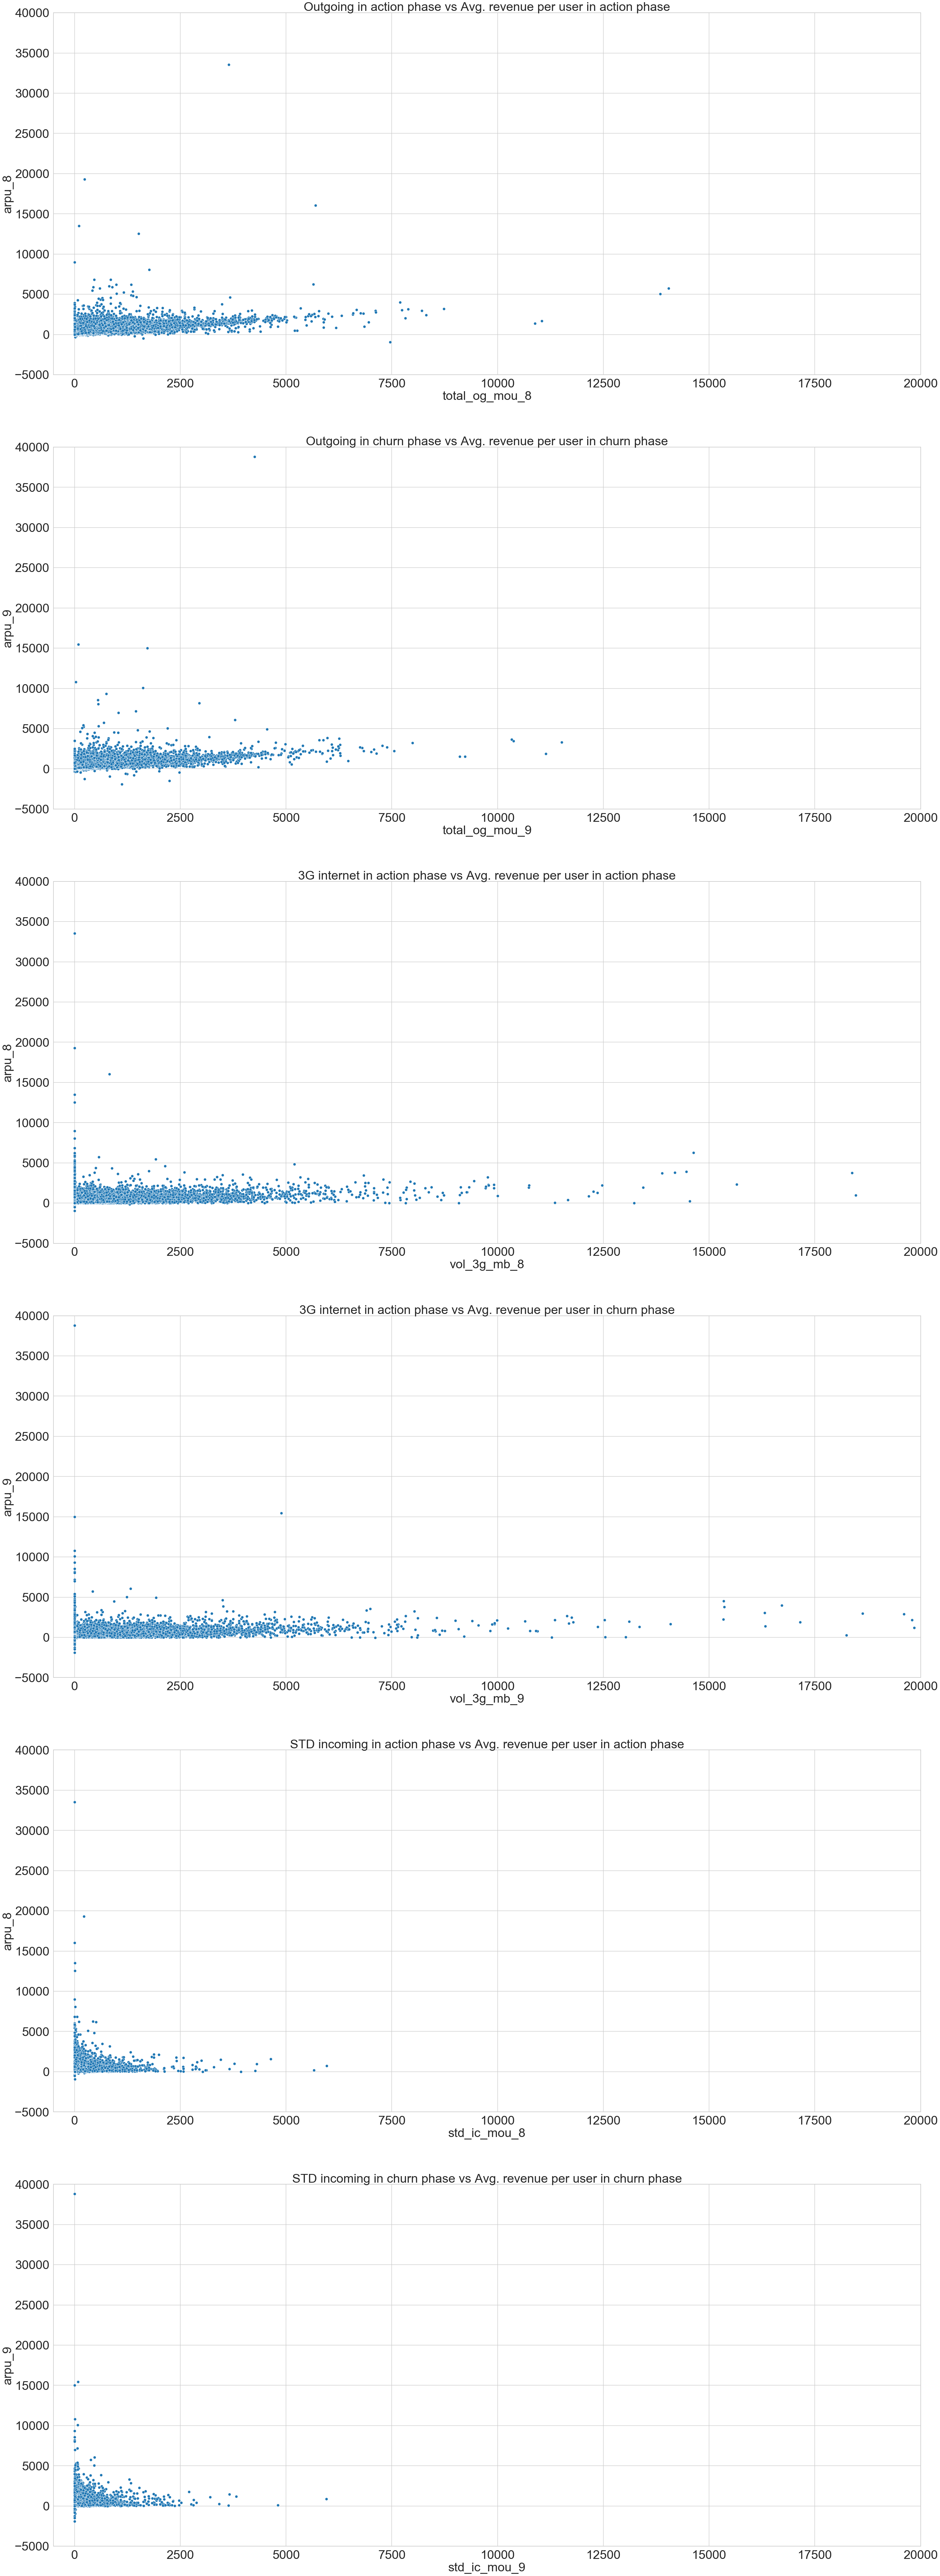

In [232]:

# Setting size of figure, context and gridlines

plt.figure(figsize=(50,150))
plt.tight_layout()

sns.set_style('whitegrid')
sns.set_context('talk')

# Title and columns names for the dataset

col={0:['total_og_mou_8','Outgoing in action phase','arpu_8','Avg. revenue per user in action phase'],
     1:['total_og_mou_9','Outgoing in churn phase','arpu_9','Avg. revenue per user in churn phase'],
     2:['vol_3g_mb_8','3G internet in action phase','arpu_8','Avg. revenue per user in action phase'],
     3:['vol_3g_mb_9','3G internet in action phase','arpu_9','Avg. revenue per user in churn phase'],
     4:['std_ic_mou_8','STD incoming in action phase','arpu_8','Avg. revenue per user in action phase'],
     5:['std_ic_mou_9','STD incoming in churn phase','arpu_9','Avg. revenue per user in churn phase']}

# Visualising the outliers with boxplot for all the variables 

for i in range(6):
    plt.subplot(6,1,i+1)
    plt.yticks(fontsize=40)
    plt.xticks(fontsize=40)
    plt.ylim(-5000,40000)
    plt.xlim(-500,20000)
    plt.title(col[i][1]+' '+'vs'+' '+col[i][3],fontsize=40)
    plt.xlabel(col[i][1],size=40)
    plt.ylabel(col[i][2],size=40)
    sns.scatterplot(x=df[col[i][0]],y=df[col[i][2]],data=df,palette='Paired')  
    

  

Points to be concluded from above plotting-
 - Average revenue with outgoing calls exhibits linearity with outliers in action phase, same is shown for churn phase and the density decreases as well as outliers in this phase.
 - 3G volume data resembles with action phase and churn phase, but in churn phase number of outliers incresases with linearity. 
 - STD incoming calls also shows less usage and revenue when compared with action phase for churn phase.
 
This shows that the customers were not using roaming or std facility well enough hence less revenue is genarated here.

## Derived Metrics

Now, let's derive some columns from the dataset like day since last recharge, this will tell us the user last payment to service provider also this tells us that most of the customers are likely to churn(not all because there may be a case where customer can go out of station).

In [233]:
columns=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6',
        'date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']


df[columns]=df[columns].apply(lambda x:pd.to_datetime(x))   # Changing the format from object to date type

In [234]:
# Calculating the number of days for last recharge

df['days_since_last_recharge_6']=df['last_date_of_month_6']-df['date_of_last_rech_6']
df['days_since_last_recharge_7']=df['last_date_of_month_7']-df['date_of_last_rech_7']
df['days_since_last_recharge_8']=df['last_date_of_month_8']-df['date_of_last_rech_8']
df['days_since_last_recharge_9']=df['last_date_of_month_9']-df['date_of_last_rech_9']

In [235]:
# Changing the datatype from object to numerical 

df['days_since_last_recharge_6']=df['days_since_last_recharge_6'].astype('str').apply(lambda x:int(x.split(" ")[0]))
df['days_since_last_recharge_7']=df['days_since_last_recharge_7'].astype('str').apply(lambda x:int(x.split(" ")[0]))
df['days_since_last_recharge_8']=df['days_since_last_recharge_8'].astype('str').apply(lambda x:int(x.split(" ")[0]))
df['days_since_last_recharge_9']=df['days_since_last_recharge_9'].astype('str').apply(lambda x:int(x.split(" ")[0]))

In [236]:
# Dropping redundant columns

df=df.drop(columns,axis=1)

In [237]:
df.info()  # Checking the info of the dataset after derived metrics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 179 entries, mobile_number to days_since_last_recharge_9
dtypes: float64(140), int64(39)
memory usage: 136.6 MB


### Filtering high value customers

Getting the high value customers is our main business goal to prediction the churn, hence filtering them.

In [238]:
# Filtering

# Taking mean from both good phase 

df['Average_rch_amt']=df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)   

quantile=df['Average_rch_amt'].quantile([0.70]).values                           # doing percentile for 70%

df['High-value customer']=(df['Average_rch_amt']).apply(lambda x :1 if x >= quantile else 0)  # assigning 1 and 0 for identifying high value customers  

df['High-value customer'].value_counts()   # Checking the count for number of high value customers

0    69988
1    30011
Name: High-value customer, dtype: int64

### Tagging churners and removing the attributes of the churn phase

In [239]:
# Tagging churn customer and non churn customer with 1 and 0

tag_churners_cols=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

df['Churn']=(df['total_ic_mou_9']+df['total_og_mou_9']+df['vol_2g_mb_9']+df['vol_3g_mb_9']).apply(lambda x: 1 if x <= 0 else 0)

df['Churn'].value_counts()

0    89808
1    10191
Name: Churn, dtype: int64

In [240]:
# Dropping redundant columns

df=df.drop(tag_churners_cols,axis=1)

df=df.drop(['mobile_number','circle_id'],axis=1)

## Model Building

In [241]:
new_df=df.copy()   # Taking copy of our original dataset

In [242]:
# Setting X anf y from the dataset

X=new_df.drop('Churn',1)
y=new_df['Churn']

In [243]:
# Splitting the dataset into train and test set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

### Dimentionality Reduction # PCA

As we have large number of columns, it will be difficult to create a model hence by using pca we will reduce the number of features. 

In [244]:
# Importing PCA module

from sklearn.decomposition import PCA

pca=PCA(svd_solver='randomized',random_state=42)    # creating an object for PCA

pca.fit(X_train)                                  # fitting the dataset with PCA object

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

**Let's plot the first two principal components on x-y axes and try to understand the feature sense**

In [245]:
# Defining the components in a new dataframe

col_names=list(X_train)
pca_df=pd.DataFrame({'PC1': pca.components_[0],'PC2':pca.components_[1], 'Feature':col_names})
pca_df.head()

,PC1,PC2,Feature
0,0.161000,0.058475,arpu_6
1,0.180461,0.053519,arpu_7
2,0.179610,0.057911,arpu_8
3,0.160963,0.057938,arpu_9
4,0.115350,-0.040029,onnet_mou_6


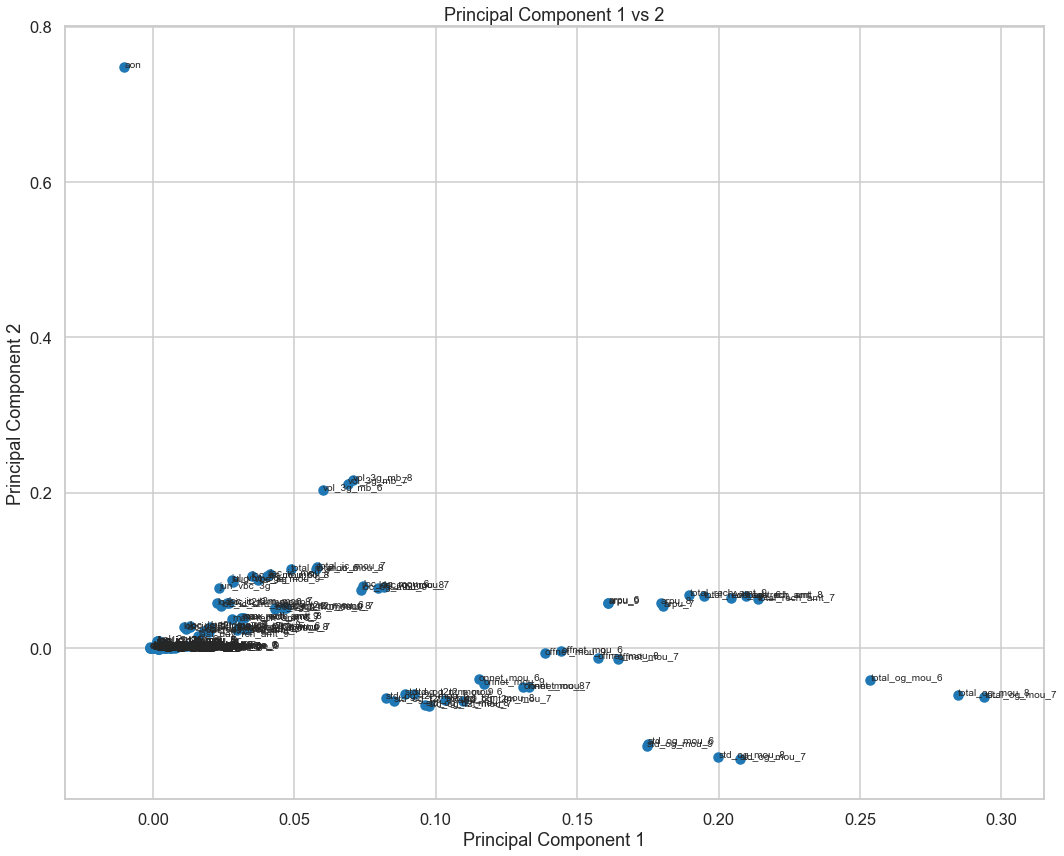

In [246]:
# plotting the two principal components in scatter plot

%matplotlib inline
fig=plt.figure(figsize=(15,12))                 # setting the figure
plt.scatter(pca_df.PC1,pca_df.PC2)            # using scatter plot 
plt.title('Principal Component 1 vs 2')       # setting the title
plt.xlabel('Principal Component 1')           # setting the x-label
plt.ylabel('Principal Component 2')           # setting the x-label

# setting the features name on the datapoints

for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt,(pca_df.PC1[i],pca_df.PC2[i]))
    
plt.tight_layout()    # changing the layout
plt.show()            # showing the plot

Total ongoing calls for good phase and action phase is having on the direction of principal component 1

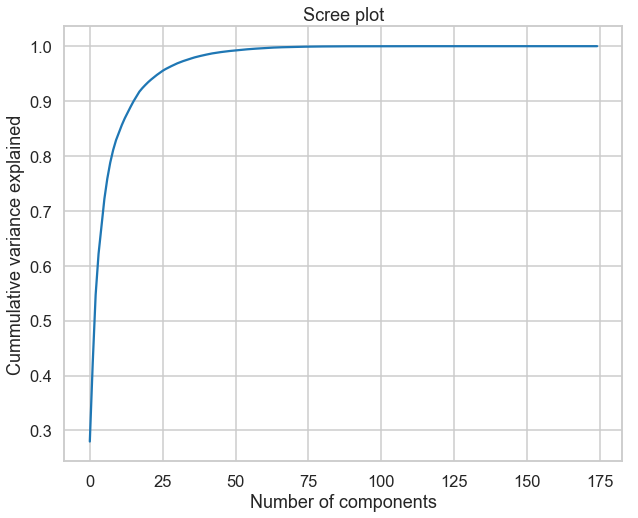

In [247]:
# Screeplot - plotting for cummulative explained_variance_ratio against number of components

# setting the style of the graph and figure size

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))

plt.plot(np.cumsum(pca.explained_variance_ratio_))    # plotting using cumsum

# Labelling the graph on title and axes(X and Y)

plt.title('Scree plot')
plt.xlabel('Number of components')
plt.ylabel('Cummulative variance explained')

plt.show()

From the above screeplot, we can conclude that number of components 45 is best to choose, as it is having 97 percent approximately cummulative variance. Which means by choosing 45 we can explain 97% approximately  of variance. 

In [248]:
# Importing incremeantal PCA for efficiency

from sklearn.decomposition import IncrementalPCA

pca_final=IncrementalPCA(n_components=45)  # Chossing k=45 as it explains about 97% of variance - visualized from screeplot

In [249]:
# Transformation - getting data on principal components

pca_df=pca_final.fit_transform(X_train)

pca_df.shape     # shape of the dataset

(69999, 45)

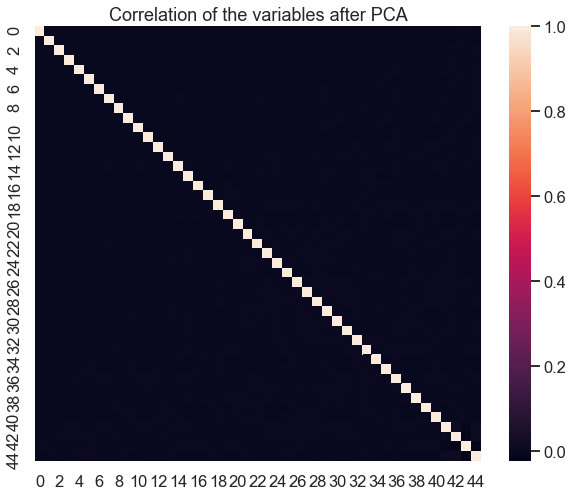

In [250]:
# Checking the correlation of the new dataset(After PCA)

corr_pca=np.corrcoef(pca_df.transpose())

# now plotting heatmap

%matplotlib inline 
plt.figure(figsize=(10,8))        # setting the figure size

# setting title

plt.title("Correlation of the variables after PCA")

sns.heatmap(corr_pca)   # Plotting heatmap

In [253]:
# 1s to 0s in diagonals
diagonals = corr_pca - np.diagflat(corr_pca.diagonal())
print("max corr:",diagonals.max(), ", min corr: ", diagonals.min(),)


max corr: 0.011854862560183525 , min corr:  -0.023991861712038907


**we see that correlations are indeed very close to 0**

In [254]:
#Applying selected components to the test data

df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(30000, 45)

### Logistic Regression

Now, using this PCA features, we will use X train for logistic regression  

In [255]:
# Training the model on the train data

from sklearn.linear_model import LogisticRegression

log_pca = LogisticRegression()
model_pca = log_pca.fit(pca_df,y_train)

In [256]:
# Making prediction on the test data

y_pred=model_pca.predict(df_test_pca)

In [257]:
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score

print("Accuracy Score:{: }".format(accuracy_score(y_test,y_pred)))
print("Recall Score:{: }".format(recall_score(y_test,y_pred)))
print("F1 Score:{: }".format(f1_score(y_test,y_pred)))

Accuracy Score: 0.9631
Recall Score: 0.7454128440366973
F1 Score: 0.8043132402333392


As we can see from above evaluation we have high accuracy but less recall and f1 score.

 
We have also seen that our data is imbalance which means for one class we have large proportions of data but for another we have less, hence this issue is stopping us from to create a stable model.
From next step we will use resampling dataset and we will create more stable model.

## Resampling

### Oversampling

In [262]:
from sklearn.utils import resample  # Calling resample library

In [259]:
# Oversampling

y=new_df['Churn']
X=new_df.drop('Churn',1)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.60,test_size=0.40,random_state=40)  # Splitting the dataset 

X=pd.concat([X_train,y_train],axis=1)  # Again adding only train set

# Diffrentiating the dataset with churn and not churn labels

not_churn=X[X.Churn==0]   
churn=X[X.Churn==1]

churn_upsampled=resample(churn,replace=True, n_samples=len(not_churn),random_state=40)  # resampling the churn dataset as it has less number of rows

upsampled=pd.concat([not_churn,churn_upsampled]) # Adding them in one dataset

upsampled.Churn.value_counts() # checking the count

1    53864
0    53864
Name: Churn, dtype: int64

Now going forward we ill use this train dataset for creating a model

#### 1. Logistic Regression

In [260]:
y_train=upsampled['Churn']         # Creating y train set
X_train=upsampled.drop('Churn',1)  # Creating X train set

pca_final=IncrementalPCA(n_components=45)    # PCA with 45 components

# Doing the transformation

pca_df_train=pca_final.fit_transform(X_train)
pca_df_test= pca_final.transform(X_test)

# Creating model using logistic regression

log_pca = LogisticRegression()
model1=log_pca.fit(pca_df_train,y_train)

In [261]:

y_pred=model1.predict(pca_df_test)   # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test,y_pred)))
print("Recall Score is:","{: }".format(recall_score(y_test,y_pred)))
print("Precision Score is :","{: }".format(precision_score(y_test,y_pred)))
print("F1 Score is:","{: }".format(f1_score(y_test,y_pred)))

Accuracy Score is:  0.89845
Recall Score is:  0.9571005917159763
Precision Score is :  0.4996138996138996
F1 Score is:  0.656519533231862


**As we can see after resampling our recall score increased but not the f1 score, lets try another algorithm.**

#### 2. Random Forest

In [263]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [264]:
y_pred_rfc=rfc.predict(X_test)   # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test,y_pred_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test,y_pred_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test,y_pred_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test,y_pred_rfc)))

Accuracy Score is:  0.99815
Recall Score is:  0.9906311637080868
Precision Score is :  0.9911198815984213
F1 Score is:  0.9908754623921086


As we can see now, all the scores(accuracy, recall, precision and f1) are increased. This does look like stable model.

### Let's try resampling with another technique called SMOTE and compare the results

### SMOTE

In [265]:
from imblearn.over_sampling import SMOTE   # Improting SMOTE library

y=new_df.Churn                  # Creating y train set
X=new_df.drop('Churn',axis=1)   # Creating X train set

X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X, y, test_size=0.30,random_state=40)  # Splitting the dataset

# SMOTE

smote_df=SMOTE(random_state=40)
X_train_sm,y_train_sm=smote_df.fit_sample(X_train_sm,y_train_sm)

#### Logistic Regression

In [266]:
pca_final=IncrementalPCA(n_components=45)    # PCA with 45 components


# Doing the transformation

pca_df_train=pca_final.fit_transform(X_train_sm)
pca_df_test= pca_final.transform(X_test_sm)


# Creating model using logistic regression

log_pca = LogisticRegression()
model3=log_pca.fit(pca_df_train,y_train_sm)

In [267]:
y_pred=model3.predict(pca_df_test)      # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test_sm,y_pred)))
print("Recall Score is:","{: }".format(recall_score(y_test_sm,y_pred)))
print("Precision Score is :","{: }".format(precision_score(y_test_sm,y_pred)))
print("F1 Score is:","{: }".format(f1_score(y_test_sm,y_pred)))

Accuracy Score is:  0.9063
Recall Score is:  0.9474548440065681
Precision Score is :  0.5211343930635838
F1 Score is:  0.672415802354038


As we can see even with SMOTE resampling, the precision score and f1 score not improved. Hence here random forest comes to the rescue.

#### Random Forest

In [268]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=100)

rfc.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [269]:
y_pred_rfc=rfc.predict(X_test_sm)    # Predicting the test set

# Model evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test_sm,y_pred_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test_sm,y_pred_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test_sm,y_pred_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test_sm,y_pred_rfc)))

Accuracy Score is:  0.9974333333333333
Recall Score is:  0.9881773399014778
Precision Score is :  0.9865573770491803
F1 Score is:  0.9873666940114848


As we can see now, all the scores(accuracy, recall, precision and f1) are increased. This also does look like stable model but having little less value than the model created with oversampling.

### Let's try now create two models(from Cross validation) - one from SMOTE Random Forest model and another from Oversampling Random Forest model and compare the final metrics from evaluation for our best model.

## SMOTE 

### k-fold grid search cross validation

In [270]:
# Importing necessary libraries for grid search cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [271]:
final_smote_rfc=RandomForestClassifier(random_state=50)  # Initialising our object

n_folds=KFold(n_splits=5,shuffle=True,random_state=50)   # Setting number of folds equal to 5

# Passing parameters for tuning

parameters={'criterion':['gini','entropy'],
           'max_depth': range(10,200,50)}

# Creating a model using Gridsearch CV

model_cv= GridSearchCV(estimator=final_smote_rfc,param_grid=parameters,cv=n_folds,verbose=1,
                      return_train_score=True,scoring='recall')

In [272]:
model_cv.fit(X_train_sm,y_train_sm)  # Fitting our model

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 13.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(10, 200, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [273]:
model_cv.best_params_    # Getting the best parameters to generate stable model

{'criterion': 'gini', 'max_depth': 10}

In [274]:
# Random forest classifier

final_smote_rfc=RandomForestClassifier(criterion='gini',max_depth=10,random_state=50)
final_smote_rfc.fit(X_train_sm,y_train_sm)                 # Fitting in train set
y_pred_smote_rfc=final_smote_rfc.predict(X_test_sm)        # Predicting in test set

In [275]:
# Model Evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test_sm,y_pred_smote_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test_sm,y_pred_smote_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test_sm,y_pred_smote_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test_sm,y_pred_smote_rfc)))

Accuracy Score is:  0.9935
Recall Score is:  0.993431855500821
Precision Score is :  0.9453125
F1 Score is:  0.9687750200160129


The evaluation metrics gives us promising score with 99% of recall and 96% of f1 score.

## Oversampling


### k-fold grid search cross validation

In [276]:
# Importing necessary libraries for grid search cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [277]:
final_rfc=RandomForestClassifier(random_state=50)       # Initialising our object

n_folds=KFold(n_splits=5,shuffle=True,random_state=50)  # Setting number of folds equal to 5

# Passing parameters for tuning

parameters={'criterion':['gini','entropy'],'max_depth': range(10,200,50)}

# Creating a model using Gridsearch CV

model_cv= GridSearchCV(estimator=final_rfc,param_grid=parameters,cv=n_folds,verbose=1,
                      return_train_score=True,scoring='recall')

In [278]:
model_cv.fit(X_train,y_train)   # Fitting our model

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=50, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(10, 200, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='recall', verbose=1)

In [279]:
model_cv.best_params_   # Getting the best parameters to generate stable model

{'criterion': 'gini', 'max_depth': 10}

In [280]:
# Random forest classifier

final_rfc=RandomForestClassifier(criterion='gini',max_depth=10,random_state=50)
final_rfc.fit(X_train,y_train)         # Fitting in train set
y_pred_rfc=final_rfc.predict(X_test)   # Predicting in test set

In [281]:
# Model Evaluation

print("Accuracy Score is:","{: }".format(accuracy_score(y_test,y_pred_rfc)))
print("Recall Score is:","{: }".format(recall_score(y_test,y_pred_rfc)))
print("Precision Score is :","{: }".format(precision_score(y_test,y_pred_rfc)))
print("F1 Score is:","{: }".format(f1_score(y_test,y_pred_rfc)))

Accuracy Score is:  0.994775
Recall Score is:  0.998767258382643
Precision Score is :  0.9520564042303172
F1 Score is:  0.9748526049813501


#### Our final model gives best recall score which is the most important among all the other metric score. This reflects our business goal is acheived.

**Our final model is final_rfc, gives stable model among all the models I have created.**

## Feature Importance

To find the important features that are strong predictors to churn, below data will show us the all the feature contribution in predciting a churn.

In [282]:
features=np.array(X_train.columns)
val_features=final_rfc.feature_importances_
features_index=val_features.argsort()
for i in features_index:
    print("{} : {:.2f}%".format(features[i],val_features[i]*100))

High-value customer : 0.00%
std_ic_t2o_mou_9 : 0.00%
loc_og_t2c_mou_6 : 0.00%
og_others_7 : 0.00%
std_ic_t2o_mou_8 : 0.00%
std_ic_t2o_mou_7 : 0.00%
std_ic_t2o_mou_6 : 0.00%
std_ic_t2f_mou_7 : 0.00%
std_ic_t2f_mou_6 : 0.00%
std_ic_t2m_mou_7 : 0.00%
std_og_t2f_mou_8 : 0.00%
std_og_t2f_mou_9 : 0.00%
std_og_t2c_mou_6 : 0.00%
std_og_t2c_mou_7 : 0.00%
std_og_t2c_mou_8 : 0.00%
std_og_t2c_mou_9 : 0.00%
og_others_9 : 0.00%
og_others_8 : 0.00%
isd_og_mou_6 : 0.00%
isd_og_mou_8 : 0.00%
isd_ic_mou_6 : 0.00%
isd_ic_mou_7 : 0.00%
og_others_6 : 0.00%
ic_others_7 : 0.00%
isd_ic_mou_8 : 0.00%
ic_others_8 : 0.00%
monthly_2g_7 : 0.00%
sachet_2g_6 : 0.00%
loc_ic_t2t_mou_6 : 0.00%
loc_ic_t2f_mou_6 : 0.00%
isd_og_mou_9 : 0.00%
std_og_t2f_mou_7 : 0.00%
loc_ic_t2f_mou_8 : 0.00%
aug_vbc_3g : 0.00%
spl_ic_mou_7 : 0.00%
total_rech_num_8 : 0.00%
loc_ic_t2t_mou_7 : 0.00%
days_since_last_recharge_8 : 0.00%
loc_og_t2c_mou_8 : 0.00%
sachet_3g_8 : 0.00%
spl_og_mou_6 : 0.00%
loc_og_t2c_mou_7 : 0.00%
sachet_2g_8 : 0.00%

# Conclusion

The most important features for predicting a customer to churn are as follows in decending order.
 - **total_rech_amt_9** : 14.92%    
 - **loc_og_t2t_mou_9** : 10.17%
 - **total_ic_mou_8**   :  7.03%
 - **std_og_t2m_mou_8** :  6.40%
 - **std_ic_t2m_mou_9** :  5.88%
 - **loc_ic_mou_9**     :  5.02%
 - **loc_ic_t2f_mou_9** :  4.83%
 - **std_og_mou_9**     :  4.82%
 - **max_rech_amt_9**   :  4.57%
 - **spl_og_mou_9**     :  4.00%
 - **arpu_8**           :  3.40%
 - **arpu_9**          :  3.20%
 - **loc_og_t2m_mou_9** : 3.14%
 - **loc_ic_t2t_mou_9** : 2.70%
 - **roam_og_mou_8**    : 2.26%
 - **loc_og_mou_9**     : 1.99%
 - **loc_ic_t2m_mou_9** : 1.83%
 - **offnet_mou_9**     : 1.60%
 - **onnet_mou_9**      : 1.38%
 - **roam_ic_mou_8**    : 1.24%
 - **loc_ic_mou_7**     : 1.18%
 - **total_rech_num_9** : 1.10%
 
    
**These are most important features business should concentrate on to retain high value customers**

## Recommendation

 - Look into STD calls and roaming calls customers, focus on them ; Give offers to these customers.
 - Local calling customer from one operator to other mobile is huge; Give best offers to them.
 - Also give special offers to the customer who are calling locally within same operator.